$\newcommand\E{{\mathbf E}}$
$\newcommand\indi[1]{{\mathbf 1}_{\displaystyle #1}}$
$\newcommand\inde[1]{{\mathbf 1}_{\displaystyle\left\{ #1 \right\}}}$
$\newcommand{\ind}{\inde}$
$\newcommand{\N}{{\mathbb N}}$
$\newcommand{\P}{{\mathbb P}}$
$\newcommand{\R}{{\mathbb R}}$
$\newcommand{\Z}{{\mathbb Z}}$

<h1 align="center">Méthode de monte-carlo pour le pricing d'option</h1>
<h2 align="center">Le modèle de Black et Scholes</h2>
<h3 align="center">Bernard Lapeyre, Octobre  2021</h3>

## 1. Préliminaires

__Question 1.1.__ Ecrire une fonction __Python__ qui calcule la moyenne
  empirique `Moyenne`, la variance empirique `Variance`
  empirique d'un tableau de nombre.
  
Vérifiez qu'elles coïncident (presque) avec les fonctions prédéfinies de __Python__: `np.mean`, `np.var`.

In [12]:
import numpy as np;
import math;
import scipy.stats as stats;
import random;
import matplotlib.pyplot as plt;

def moyenne(x):
  res=A_FAIRE
  return res


def Variance(x):
  res = A_FAIRE
  N = np.size(x)
  return res*N/(N-1)

In [13]:
n=1000
x=np.random.rand(n) # n tirages uniforme sur [0,1]
print('Mes functions   : ','{0:.7f}'.format(moyenne(x)),', --------- ,','{0:.7f}'.format(Variance(x)))
print('Celles de numpy : ','{0:.7f}'.format(np.mean(x)),',','{0:.7f}'.format(np.var(x)),
      ',','{0:.7f}'.format(np.var(x)*n/(n-1)))
# visiblement Numpy utilise l'estimateur de variance non biaisé

NameError: name 'A_FAIRE' is not defined

 __Question 1.2.__ Ecrire une fonction permettant de simuler un vecteur consitué
  de variables aléatoires gaussiennes centrées réduites indépendantes.

  Tracer l'histogramme du vecteur obtenu et verifier qu'il correspond bien
  à la loi gaussienne centrée réduite. 

  Cette fonction existe dans __Python__ : `np.random.normal(size=n)`.


NameError: name 'A_FAIRE' is not defined

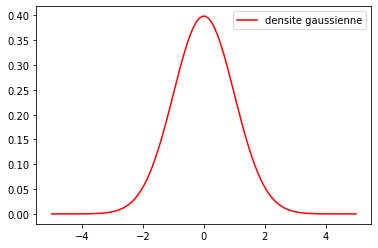

In [3]:
def gauss(N):
  U=np.random.rand(N)# U est un vecteur (1,n)
  V=np.random.rand(N)# V est un vecteur (1,n)
  return A_FAIRE

# On trace la densité de la gaussienne centrée réduite
x = np.linspace(-5,5,100)
densiteGaussienne = 1./np.sqrt(2*np.pi)*np.exp(-0.5*x**2)
plt.plot(x, densiteGaussienne, color="red", label="densite gaussienne")
plt.legend(loc="best")

# On superpose avec une densite empirique (obtenue par simulation)
X=gauss(10000)  # notre tirage gaussien
                # on aurait pu utiliser X = np.random.normal(size=10000)
                # qui fait le meme chose
plt.hist(X, density="True", bins=100, label="erreur normalisee");

__Question 1.3.__ On cherche à calculer par simulation $\E(e^{\beta G})$ où $G$
  est une gaussienne centrée réduite. On rappelle que $\E(e^{\beta
    G})=\exp(\beta^2/2)$.

  Calculer par simulation $\E(e^{\beta G})$ pour
  $\beta=1,1.5,2$. Précisez à chaque fois une intervalle de confiance.

In [4]:
def test_1(N,b):
# Pour beta < 3. La méthode de MC marche correctement.
    X=np.exp(b*np.random.normal(size=N))

    valeur_exacte  = np.exp(b*b/2);
    valeur_estimee = np.mean(X);

    erreur_exacte  = np.abs(valeur_estimee - valeur_exacte) ;

    erreur_estimee = A_FAIRE
    erreur_estimee = 1.96 * np.sqrt(variance_estimee)/np.sqrt(N);
     
    print("beta =",b,", N=",N,", Erreur relative exacte = ",'{0:.2f}'.format(100* erreur_exacte / valeur_exacte),
          ", Erreur relative estimee = ", '{0:.2f}'.format(100 * erreur_estimee / valeur_exacte),"%")    
    
N=1000000
test_1(N,1);
test_1(N,1.5);
test_1(N,2);

NameError: name 'A_FAIRE' is not defined

__Question 1.4.__ On va regarder ce qui se passe pour des valeurs de $\beta$ plus grande que $3$.

  Calculer par simulation $\E(e^{\beta G})$ pour
  $\beta=4,6,8,10\ldots$. Précisez à chaque fois l'erreur relative exacte (i.e. la différence entre la valeur
  calculée et la valeur exacte divisée par la valeur exacte) comise.
  
  Dans ce cas, on ne peut pas non plus compter sur l'estimateur de la variance (pourquoi ?). 
  Vérifier par simulation que l'estimation que l'on utilise classiquement pour obtenir l'intervalle de confiance 
  n'est pas fiable.
  
  Pour quelles valeurs de $\beta$ peut on utiliser cette
  méthode de monte-carlo de façon fiable ?

In [5]:
def test_2(N,b):
# La méthode de Monte-Carlo ne fonctionne pas quand beta est grand
    X=np.exp(b*np.random.normal(size=N))

    valeur_estimee = np.mean(X);
    valeur_exacte  = np.exp(b*b/2);
    
    erreur_relative  = A_FAIRE
    print("beta=",b,"N=",N,", Valeur = ",'{0:.2f}'.format(valeur_exacte),
          ", Erreur relative exacte  = ", '{0:.1f}'.format(100 * erreur_relative) ,"%")    
    
def test_3(N,b):
# La variance empirique converge mal. Elle ne permet pas d'obtenir un intervalle de confiance
# fiable. Mais le théorème de la limite centrale reste vrai ...
    X=np.exp(b*np.random.normal(size=N))

    valeur_exacte  = np.exp(b*b/2);

    valeur_estimee = np.mean(X);
    variance_estimee = Variance(X)
    
    erreur = np.abs(valeur_estimee - valeur_exacte) ;
    erreur_estimee = 1.96 * np.sqrt(variance_estimee)/np.sqrt(N);
    
    #print("beta=",b,"var exact=",'{0:.1f}'.format(var_exact),", var estime=",'{0:.1f}'.format(var_estime),'{0:.1f}'.format(var_exact/var_estime))
    print("beta=",b,"N=",N,", Valeur = ",'{0:.2f}'.format(valeur_exacte),
          ", Erreur relative = ", '{0:.1f}'.format(100 * erreur / valeur_exacte),"%, ",
          ", Erreur relative estimee = ", '{0:.1f}'.format(100 * erreur_estimee / valeur_exacte),"%")    

# La méthode de MC ne fonctionne pas dans ce cas. Variance trop grande.
N=1000000
test_2(N,4);
test_2(N,6);
test_2(N,8);
test_2(N,10);

print('\n');print('\n');

# L'estimateur de variance est lui aussi inutile ...
# La variance est encore plus difficile à estimer que l'espérance !
N=1000000
test_3(N,4);
test_3(N,6);
test_3(N,8);
test_3(N,10);

NameError: name 'A_FAIRE' is not defined

## 2. Le modèle de Black et Scholes

On suppose que $(W_t,t\geq 0)$ est un mouvement brownien. En particulier, pour tout temps $T$,
$W_T$ est une gaussienne centrée de variance $T$.

On considère le modèle de Black et Scholes :
$$
  S_t = S_0 \exp\left(\left(r-\frac{\sigma^2}{2}\right)t + \sigma W_t\right).
$$
On supposera dans la suite que $S_0=100$, 
$\sigma=0.3$ (volatilité annuelle) et $r=0.05$ (taux d'intérêt
exponentiel annuel).

__Question 2.1.__ Tracer l'histogramme de la loi de $S_T$, pour $T=1$,
  $\sigma=0.3$ (volatilité annuelle) et $r=0.05$ (taux d'intérêt
  exponentiel annuel).

In [6]:
T=1; # an
S_0=100; 
r=0.05; # par an
sigma=0.3; # par racine d'annee sigma^2 * T  est sans dimension
K=100;

# Question 1
N=10000;
W_T=np.sqrt(T)*np.random.normal(size=N);
S_T=A_FAIRE
plt.hist(W_T, density="True", bins=100, label="erreur normalisee");

NameError: name 'A_FAIRE' is not defined

In [7]:
plt.hist(S_T, density="True", bins=100, label="erreur normalisee");

NameError: name 'S_T' is not defined

__Question 2.2.__ On cherche à calculer le prix d'un call de strike $K=100$.
  Calculer ce prix par une méthode de monte-carlo avec un nombre
  de tirages égaux à $N=1000$,$1000$,$10000$. On précisera 
  l'intervalle de confiance.

In [8]:
# Question 2
T=1; # an
S_0=100; 
r=0.05; # par an
sigma=0.3; # par racine d'annee sigma^2 * T  est sans dimension
K=100;

def stdev(payoff):
    return np.sqrt(np.var(payoff));

def call(x,K):
    return np.maximum(x-K*np.ones(np.size(x)),np.zeros(np.size(x)));

def test_call(N):
    W_T=np.sqrt(T)*np.random.normal(size=N);
    S_T=S_0*np.exp((r-sigma**2/2)*T + sigma*W_T);
    payoff=A_FAIRE

    estimation=np.mean(payoff);  # estimation de la moyenne
    ecart_type=stdev(payoff); # estimation de l'ecart type
    erreur=1.96*ecart_type/np.sqrt(N); # demi-largeur de l'intervalle de confiance
    print('Direct N =',N,':', estimation,'+-', erreur);

test_call(100);
test_call(1000);
test_call(10000);
test_call(100000);


NameError: name 'A_FAIRE' is not defined

 __Question 2.3.__ On va chercher à utiliser la variable aléatoire $S_T$ comme une
  variable de contrôle. Vérifiez que $\E(S_T)=S_0 e^{rT}$ (pourquoi ?).

  Ecrire un programme qui utilise $S_T$ comme variable de contrôle.
  Comparer la précision de cette méthode avec la précédente suivant les
  valeur relative de $K$ et $S_0$.

  Se convaincre que l'on a ainsi ramené le calcul du call à un calcul
  de put.

In [9]:
# Question 3
T=1; # an
S_0=100; 
r=0.05; # par an
sigma=0.3; # par racine d'annee sigma^2 * T  est sans dimension
K=100;

def put(x,K):
    return np.maximum(K*np.ones(np.size(x))-x,np.zeros(np.size(x)));

def test_call_arbitrage(N):
# C-P = S_0 - K exp(-rT)
# On peut donc construire un nouvel estimateur
# S_0 - K exp(-rT) + exp(-rT) * (K-S_T)_+

    W_T=np.sqrt(T)*np.random.normal(size=N);
    S_T=S_0*np.exp((r-sigma**2/2)*T + sigma*W_T);
    payoff=A_FAIRE
    
    estimation=np.mean(payoff);  # estimation de la moyenne
    ecart_type=stdev(payoff); # estimation de l'ecart type
    erreur=1.96*ecart_type/np.sqrt(N); # demi-largeur de l'intervalle de confiance

    print("CallPut N=",N,": ", estimation, "+-", erreur);

K=100;test_call(10000);test_call_arbitrage(10000);
K= 80;test_call(10000);test_call_arbitrage(10000);
K= 60;test_call(10000);test_call_arbitrage(10000);


NameError: name 'A_FAIRE' is not defined

__Question 2.4.__ On se place dans la cas d'un call de strike $K$ grand devant
  $S_0$.  Montrer par simulation que la précision relative du calcul
  décroit au fur et à mesure que $K/S_0$ décroit. On prendra $S_0=100$
  et $K=100$, $150$, $200$, $250$.  Que se passe t'il pour $K=400$ ?

In [10]:
# Question 4
T=1; # an
S_0=100; 
r=0.05; # par an
sigma=0.3; # par racine d'annee sigma^2 * T  est sans dimension

def precision_relative(K,N):
    W_T=np.sqrt(T)*np.random.normal(size=N);
    S_T=S_0*np.exp((r-sigma**2/2)*T + sigma*W_T);
    payoff=np.exp(-r*T) * call(S_T,K);

    estimation=np.mean(payoff);  # estimation de la moyenne
    ecart_type=stdev(payoff); # estimation de l'ecart type
    erreur=1.96*ecart_type/np.sqrt(N); # demi-largeur de l'intervalle de confiance

    erreur_relative=A_FAIRE
    print("Précision relative en % : ",100 * erreur_relative);

S_0=100;N=10000;
precision_relative(100,N)
precision_relative(150,N)
precision_relative(200,N)
precision_relative(250,N)


NameError: name 'A_FAIRE' is not defined

__Question 2.5.__ Montrer que:
  $$
  \E\left(f(W_T)\right) 
     = \E\left(e^{-\lambda W_T -\frac{\lambda^2 T}{2}}f(W_T+\lambda T)\right).
  $$
  On se place dans le cas du call avec $S_0=100$ et $K=150$.
  Proposer une valeur de $\lambda$ permettant de réduire la variance de
  la simulation.

In [11]:
# Question 5

# La formule de Black et Scholes
# pour verifier

def NN(x):
    return stats.norm.cdf(x,0,1);

def BS_Call(S_0,K,sigma,r,T):
    d1=(math.log(S_0/K)+(r+sigma**2/2)*T)/(sigma*math.sqrt(T));
    d2=d1-sigma*np.sqrt(T);
    return S_0*NN(d1)-K*np.exp(-r*T)*NN(d2);

def test_call_girsanov(r, sigma, S_0, T, K, Lambda,N):
    W_T=math.sqrt(T)*np.random.normal(size=N);
    S_T=S_0*np.exp((r-sigma**2/2)*T + sigma*(W_T+Lambda* T));
    payoff=math.exp(-r*T) * call(S_T,K);
    importance = A_FAIRE# Pour l'importance voir la formule du texte
    payoff = importance * payoff; 

    estimation=np.mean(payoff);  # estimation de la moyenne
    ecart_type=stdev(payoff); # estimation de l'ecart type
    erreur=1.96*ecart_type/math.sqrt(N); # demi-largeur de l'intervalle de confiance
    print("Girsanov, (lambda=",Lambda,"), N=",N, " :", estimation,"+-", erreur);

T = 1; # an
S_0 = 100; 
r = 0.05; # par an
sigma = 0.3; # par racine d'annee sigma^2 * T  est sans dimension

N=5000;
K=150;
Lambda=0;# simulation naturelle, importance=1
test_call_girsanov(r, sigma, S_0, T, K, Lambda,N);

Lambda= (math.log(K/S_0)-(r-sigma**2/2)*T)/(sigma*T); # avec ce lambda avec proba 1/2,  S_T > K, condition d'exercice 
test_call_girsanov(r, sigma, S_0, T, K, Lambda,N);

# Vérification
print(BS_Call(S_0,K,sigma,r,T))

K=200;

Lambda=0;# simulation naturelle, importance=1
test_call_girsanov(r, sigma, S_0, T, K, Lambda,N);

Lambda= (math.log(K/S_0)-(r-sigma**2/2)*T)/(sigma*T);
    # avec ce lambda avec proba 1/2,  S_T > K, condition d'exercice 
test_call_girsanov(r, sigma, S_0, T, K, Lambda,N);

# Vérification
print(BS_Call(S_0,K,sigma,r,T))


NameError: name 'A_FAIRE' is not defined

# 3. Modèle de Panier

On s'intéresse à un modèle de panier constitué à partir de $d$ actifs.
On suppose que chacun de ces $d$ actifs de prix $S^i_t$ suit un modèle de
black et Scholes guidé par un mouvement $W^i_t$~:
$$
   \frac{d S^i_t}{S^i_t} = r dt + \sigma dW^i_t, S^i_0=x_i.
$$
On prendra dans les applications numériques $x_i=100$ et $d=10$.

Pour déterminer complètement le modèle on doit spécifier les 
corrélation entre les mouvements browniens. Pour cela on suppose
que~:
$$
   d<W_i,W_j>_t = \rho dt,
$$
$\rho$ étant une constante donnée que l'on prendra égale à $0.5$ 
dans les simulations.


__Question 3.1__ Calculer la matrice de corrélation du vecteur
  $(W^1_T,\ldots,W^d_T)$.  Montrer qu'elle est
  définie positive.

__Question 3.2__ Proposer une méthode de simulation pour le vecteur
  $(W^1_T,\ldots,W^d_T)$ et $(S^1_T,\ldots,S^d_T)$.

 __Question 3.3__ On s'intéresse maintenant au calcul du prix d'un call sur
   un indice de prix $I_t$ donnée par
   $$
      I_t = a_1 S^1_t + \cdots + a_d S^d_t.
   $$
   On prendra dans les applications numériques $a_1=\cdots=a_d=1/d$.
   Calculer par simulation la valeur du call de payoff à l'instant $T$
   $$
      \left(I_T-K\right)_+,
   $$
   et estimer l'erreur commise dans le cas où $K=I_0$.


__Question 3.3__ Montrer une relation d'arbitrage call-put et montrer que l'on
   peut l'utiliser pour mettre en oeuvre une technique de réduction de
   variance.

__Question 3.4__ En utilisant le "théorème de Girsanov" pour les $d$ mouvements
   browniens proposer une technique de réduction de variance dans le cas
   où $I_0$ est petit devant $K$.

 __Question 3.5__ En supposant que $r$ et $\sigma$ tendent vers $0$ expliquer pourquoi
 il est raisonnable d'approximer $\log(I_t/I_0)$ par:
 $$
      a_1 S^1_0 \log(S^1_t/S^1_0) + \cdots + a_d S^d_0 \log(S^d_t/S^d_0).
 $$
 En déduire une variable de contrôle pour le calcul du prix du call.
 Évaluer par simulation le gain de la méthode. 